# Information Retrieval
## Assignment 2

Team members:

1:
Amir Hesari
2:
MohammadParsa EtemadHeravi 
3:
Ali Adelkhah
4:
Reza Firouzi

Installing necessary libraries

In [ ]:
!pip install hazm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.7/316.7 KB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 50.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 KB 24.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for nltk: filename=nltk-3.3-py3-none-any.whl size=1394487 sha256=728a494471f15e9313e8378d445aaeefefd6080c5466f4c58a73dcbc0f3d39af
  Stored in directory: /root/.cache/pip/wheels/ac/62/f6/88933dadcd64a1614894614aa68cf57c4b8e5256acb650b1f1
  Created wheel for libwapiti: filename=libwapiti-0.2.1-cp39-cp39-linux_x86_64.whl size=180366 sha256=e45e3f8c21108f540673e293615f3214eb4a4a93b8fee2d8a3368125037a530c
  Stored in directory: /root/.cache/pip/wheels/8e/ff/82/9326b96f96f47472e02c453697b225813e4650c0ed4df2cd49
Successfully built nltk libwapiti
  Attempting unin

Import libraries

In [ ]:
import hazm
import nltk
import pandas

In [ ]:
!wget https://github.com/mohamad-dehghani/persian-pdf-books-dataset/raw/master/final_books.xlsx

--2023-03-30 13:49:55--  https://github.com/mohamad-dehghani/persian-pdf-books-dataset/raw/master/final_books.xlsx
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mohamad-dehghani/persian-pdf-books-dataset/master/final_books.xlsx [following]
--2023-03-30 13:49:55--  https://raw.githubusercontent.com/mohamad-dehghani/persian-pdf-books-dataset/master/final_books.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1380625 (1.3M) [application/octet-stream]
Saving to: ‘final_books.xlsx’

final_books.xlsx    100%[===================>]   1.32M  --.-KB/s    in 0.04s   

2023-03-30 13:49:55 (37.5 MB/s) 

In [ ]:
df_persian = pandas.read_excel('/content/final_books.xlsx')
df_persian.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2824 entries, 0 to 2823
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     2824 non-null   object
 1   date      2824 non-null   object
 2   content   2441 non-null   object
 3   category  2824 non-null   object
 4   author    2824 non-null   object
 5   comments  2824 non-null   object
dtypes: object(6)
memory usage: 132.5+ KB


In [ ]:
df_persian = df_persian.replace(pandas.NA, "null")
df_persian['content'] = df_persian['content'].astype("string")
df_persian['content'][0]

' تی دی جیکس یک کشیش، نویسنده، سخنران آمریکایی است. سمینار های تی دی جیکس اغلب انگیزشی و مذهبی است به همین دلیل او در ایران به سخنران انگیزشی سیاه پوست لقب گرفته است. در زندگینامه تی دی جیکس شاهد فعالیت\u200cهای مختلفی هستیم که هر کدام از آنها، خواهان تجربه و تلاش زیادی هستند. مواردی که اعلام شد تنها بخشی از فعالیت\u200cهای جیکس است. او هم اکنون کشیش خانه پاتر است و مخاطبان بسیاری دارد. موعظه\u200cهای\xa0 و سخنرانی\u200cها تی دی جیکس در کلیسا از شبکه\u200cهای تلویزیونی و رادیویی مختلف پخش می\u200cشوند. این کتاب گزیده ای از سخنرانی های آقای جیکز ، یکی از بهترین سخنران های انگیزشی در دنیا است. امید است با مطالعه دقیق و باور عمیق تغییری مثبت در زندگیتان ایجاد شود'

In [ ]:
from hazm import *

normalizer = Normalizer()
normalized_persian_hazm = []
for d in df_persian['content']:
  normalized_persian_hazm.append(normalizer.normalize(d))

normalized_persian_hazm[0]

' تی دی جیکس یک کشیش، نویسنده، سخنران آمریکایی است. سمینار\u200cهای تی دی جیکس اغلب انگیزشی و مذهبی است به همین دلیل او در ایران به سخنران انگیزشی سیاه پوست لقب گرفته است. در زندگینامه تی دی جیکس شاهد فعالیت\u200cهای مختلفی هستیم که هر کدام از آنها، خواهان تجربه و تلاش زیادی هستند. مواردی که اعلام شد تنها بخشی از فعالیت\u200cهای جیکس است. او هم اکنون کشیش خانه پاتر است و مخاطبان بسیاری دارد. موعظه\u200cهای و سخنرانی\u200cها تی دی جیکس در کلیسا از شبکه\u200cهای تلویزیونی و رادیویی مختلف پخش می\u200cشوند. این کتاب گزیده\u200cای از سخنرانی\u200cهای آقای جیکز، یکی از بهترین سخنران\u200cهای انگیزشی در دنیا است. امید است با مطالعه دقیق و باور عمیق تغییری مثبت در زندگیتان ایجاد شود'

In [ ]:
persian_tokens_hazm = []
tokenizer = WordTokenizer()
for item in normalized_persian_hazm:
  persian_tokens_hazm.append(tokenizer.tokenize(item))

persian_tokens_hazm[0]

['تی',
 'دی',
 'جیکس',
 'یک',
 'کشیش',
 '،',
 'نویسنده',
 '،',
 'سخنران',
 'آمریکایی',
 'است',
 '.',
 'سمینار\u200cهای',
 'تی',
 'دی',
 'جیکس',
 'اغلب',
 'انگیزشی',
 'و',
 'مذهبی',
 'است',
 'به',
 'همین',
 'دلیل',
 'او',
 'در',
 'ایران',
 'به',
 'سخنران',
 'انگیزشی',
 'سیاه',
 'پوست',
 'لقب',
 'گرفته_است',
 '.',
 'در',
 'زندگینامه',
 'تی',
 'دی',
 'جیکس',
 'شاهد',
 'فعالیت\u200cهای',
 'مختلفی',
 'هستیم',
 'که',
 'هر',
 'کدام',
 'از',
 'آنها',
 '،',
 'خواهان',
 'تجربه',
 'و',
 'تلاش',
 'زیادی',
 'هستند',
 '.',
 'مواردی',
 'که',
 'اعلام',
 'شد',
 'تنها',
 'بخشی',
 'از',
 'فعالیت\u200cهای',
 'جیکس',
 'است',
 '.',
 'او',
 'هم',
 'اکنون',
 'کشیش',
 'خانه',
 'پاتر',
 'است',
 'و',
 'مخاطبان',
 'بسیاری',
 'دارد',
 '.',
 'موعظه\u200cهای',
 'و',
 'سخنرانی\u200cها',
 'تی',
 'دی',
 'جیکس',
 'در',
 'کلیسا',
 'از',
 'شبکه\u200cهای',
 'تلویزیونی',
 'و',
 'رادیویی',
 'مختلف',
 'پخش',
 'می\u200cشوند',
 '.',
 'این',
 'کتاب',
 'گزیده\u200cای',
 'از',
 'سخنرانی\u200cهای',
 'آقای',
 'جیکز',
 '،',
 'یکی',
 

In [ ]:
import csv
  
  
with open('persian_tokens_hazm', 'w') as f:
      
    # using csv.writer method from CSV package
    write = csv.writer(f)
      
    write.writerows(persian_tokens_hazm)

In [ ]:


!wget http://www.cs.cmu.edu/~ark/personas/data/MovieSummaries.tar.gz
!tar -xf MovieSummaries.tar.gz
     


--2023-03-30 13:50:00--  http://www.cs.cmu.edu/~ark/personas/data/MovieSummaries.tar.gz
Resolving www.cs.cmu.edu (www.cs.cmu.edu)... 128.2.42.95
Connecting to www.cs.cmu.edu (www.cs.cmu.edu)|128.2.42.95|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48002242 (46M) [application/x-gzip]
Saving to: ‘MovieSummaries.tar.gz’

MovieSummaries.tar. 100%[===================>]  45.78M  1.62MB/s    in 32s     

2023-03-30 13:50:32 (1.42 MB/s) - ‘MovieSummaries.tar.gz’ saved [48002242/48002242]



In [ ]:
df_english = pandas.read_csv("/content/MovieSummaries/plot_summaries.txt", delimiter = "\t",names=["id","text"])
df_english.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42303 entries, 0 to 42302
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      42303 non-null  int64 
 1   text    42303 non-null  object
dtypes: int64(1), object(1)
memory usage: 661.1+ KB


In [ ]:
from nltk import *

normalizer = Normalizer()
normalized_english = []
for d in df_english['text']:
  txt = normalizer.normalize(d)
  normalized_english.append(re.sub('[^A-Za-z0-9]+', ' ' , txt))

In [ ]:
english_tokens= []
tokenizer = WordTokenizer()
for item in normalized_english:
  english_tokens.append(tokenizer.tokenize(item))

In [ ]:
import csv
  
  
with open('english-result.csv', 'w') as f:
      
    # using csv.writer method from CSV package
    write = csv.writer(f)
      
    write.writerows(english_tokens)

## HW2 (parsivar module)

In [ ]:
!pip install parsivar

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.2/36.2 MB 15.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 66.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
normalized_persian_hazm[0]

In [ ]:
from parsivar import Normalizer

normalizer = Normalizer()
persian_normalized_parsivar = []
for d in df_persian['content']:
  persian_normalized_parsivar.append(normalizer.normalize(d))


In [ ]:
persian_normalized_parsivar[0]

In [ ]:
from parsivar import Tokenizer


persian_tokens_parsivar= []
tokenizer = Tokenizer()
for item in persian_normalized_parsivar:
  persian_tokens_parsivar.append(tokenizer.tokenize_words(item))

persian_tokens_parsivar[0]

In [ ]:
len(persian_tokens_parsivar[0])

In [ ]:
len(persian_tokens_hazm[0])

In [ ]:
len(set(persian_tokens_parsivar[0]))

In [ ]:
len(set(persian_tokens_hazm[0]))

## As its visible, although there is difference in length of all_tokens array in "hazm" and "parsivar", length of unique records is the same in both modules. this means that "hazm" saves redundant records but "parsivar" doesn't.


## Lets compare result of a same sentences in both modules!!!!
they are different in half-spaces , dots and etc.



In [ ]:
print("Hazm Output:")
print(normalized_persian_hazm[5][30:400])

print()
print()
print("Parsivar Output:")
print(persian_normalized_parsivar[5][30:400])

## Removing Stopwords

In [ ]:
import nltk
from nltk import tokenize
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')

In [ ]:
english_tokens[:5]

In [ ]:
# removing all stop words of description column and replacing in dataframe
from nltk.corpus import stopwords

all_tokens_new = []
for tok in english_tokens[:10]:
  all_tokens_new.append([t for t in tok if not t in stopwords.words("english")])

print(english_tokens[5])
print(all_tokens_new[5])

In [ ]:
from hazm import stopwords_list, word_tokenize
stopwords = stopwords_list()
all_tokens_new_hazm = []
for tok in persian_tokens_hazm:
  all_tokens_new_hazm.append([word for word in tok if not word in stopwords])

clean_text = ' '.join(all_tokens_new_hazm[0])
dirty_text = ' '.join(persian_tokens_hazm[0])

print(dirty_text[:150])
print(clean_text[:150])

## Cloud Words

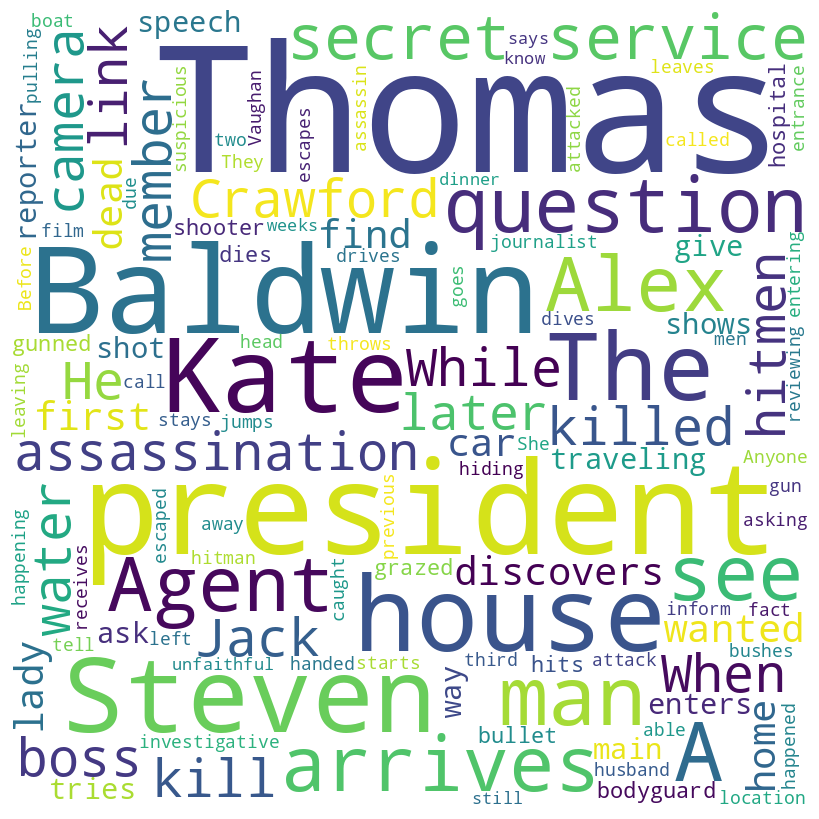

In [ ]:
# importing all necessary modules
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size=10).generate(' '.join(all_tokens_new[5]))
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [ ]:
!pip install arabic_reshaper
# !wget https://www.fontyab.com/download?id=1740
# # !unzip '/content/Noto_Naskh_Arabic.zip'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


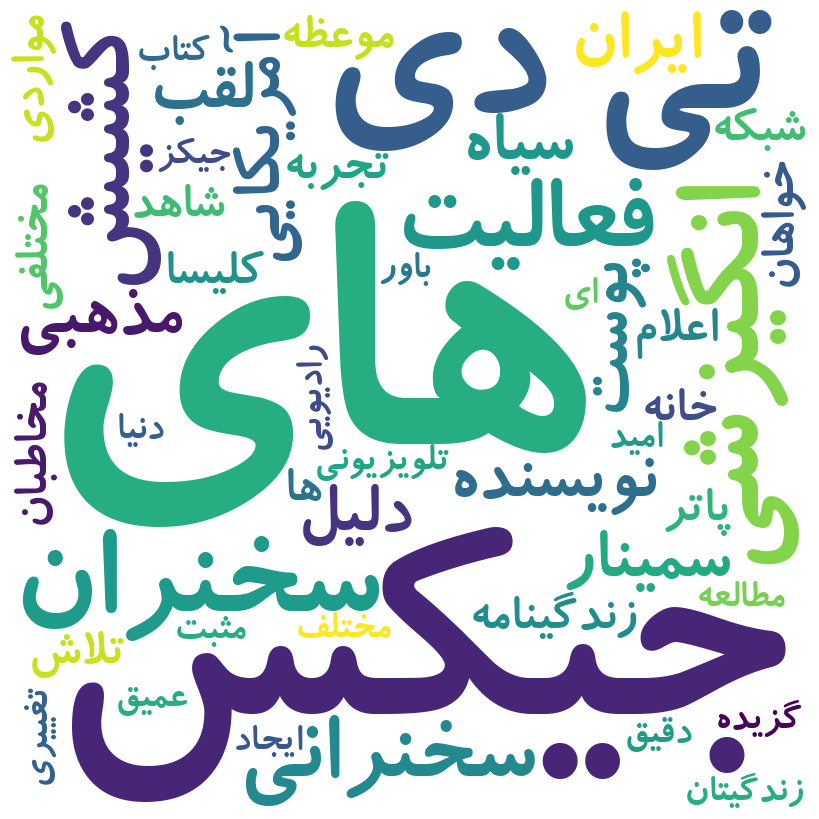

In [32]:
# importing all necessary modules
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from arabic_reshaper import reshape

clean_text_new = reshape(clean_text)

wordcloud = WordCloud(width=800, height=800,
                      background_color='white', min_font_size=10, 
                      font_path='/content/koodak.ttf'
            ).generate(clean_text_new)

# Display the generated image:
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

# Show the plot
plt.show()

## Stemming & Lemmetization

In [33]:
!python3 -m nltk.downloader wordnet
!unzip /root/nltk_data/corpora/wordnet.zip -d /root/nltk_data/corpora/

/usr/lib/python3.9/runpy.py:127: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package wordnet to /root/nltk_data...
Archive:  /root/nltk_data/corpora/wordnet.zip
   creating: /root/nltk_data/corpora/wordnet/
  inflating: /root/nltk_data/corpora/wordnet/lexnames  
  inflating: /root/nltk_data/corpora/wordnet/data.verb  
  inflating: /root/nltk_data/corpora/wordnet/index.adv  
  inflating: /root/nltk_data/corpora/wordnet/adv.exc  
  inflating: /root/nltk_data/corpora/wordnet/index.verb  
  inflating: /root/nltk_data/corpora/wordnet/cntlist.rev  
  inflating: /root/nltk_data/corpora/wordnet/data.adj  
  inflating: /root/nltk_data/corpora/wordnet/index.adj  
  inflating: /root/nltk_data/corpora/wordnet/LICENSE  
  inflating: /root/nltk_data/corpora/wordnet/citation.bib  
  inflating: /root/nltk_data/corpora/wor

In [34]:
# English DF
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
print("Sample: ", normalized_english[5])


porter_stemmer = PorterStemmer()
stemmed_tokens = []
# Stem the tokens using PorterStemmer
for tok in all_tokens_new:
  stemmed_tokens.append([porter_stemmer.stem(token) for token in tok])

# Print the stemmed tokens
print("Stemmed Tokens:", stemmed_tokens[0])




# Create a WordNetLemmatizer object
wordnet_lemmatizer = WordNetLemmatizer()

lemmatized_tokens = []
# Lemmatize the tokens using WordNetLemmatizer
for tok in all_tokens_new: 
  lemmatized_tokens.append([wordnet_lemmatizer.lemmatize(token) for token in tok])

# Print the lemmatized tokens
print("Lemmatized Tokens:", lemmatized_tokens[0])

Sample:  The president is on his way to give a speech While he is traveling there a man shows up with a camera A reporter tries to ask a member of the secret service a question When the president enters he is shot by the man with the camera The president s main bodyguard Alex Thomas is grazed by the bullet that hits the president The shooter is gunned down by Alex and other secret service agents The president dies at the hospital Kate Crawford an investigative journalist starts asking questions about the assassination Anyone she questions is killed She goes to Alex Thomas s house to tell him what is happening As they head to his boat Thomas sees some men hiding in the bushes He throws Kate into the water and dives in Thomas jumps out of the water to kill two of the hitmen while a third hitman drives off to inform his boss what happened They are able to link the hitmen to a man called Jack Baldwin Agent Thomas and other Secret Service members attack the location of Jack Baldwin Baldwin 

In [35]:
# Persian DF
from hazm import Stemmer, Lemmatizer

print("Sample: ", normalized_persian_hazm[5])

# Create a list of stems using FindStems
stemmed_tokens_fa = []
for tok in persian_tokens_hazm[5]:
  stemmed_tokens_fa.append(Stemmer().stem(tok))


# Print the stemmed tokens
print("Stemmed Tokens:", stemmed_tokens_fa)

# Create a list of lemmas using FindLemma
lemmatized_tokens_fa = []
for doc in persian_tokens_hazm[:10]:
  lemmatized_tokens_fa.append([Lemmatizer().lemmatize(tok) for tok in doc])


# Print the lemmatized tokens
print("Lemmatized Tokens:", lemmatized_tokens_fa)

Sample:   تاریخ مبارک غازانى، اثر فارسی رشیدالدین فضل‌الله بن عمادالدوله ابواخیر، هسته اصلى «جامع التواریخ» بوده و در بردارنده تاریخ ایلخانان در ایران، از هولاکو تا غازان خان مى‌باشد. ظاهرا کتاب به فرمان غازان و با دریافت مبلغ یک میلیون دینار و در زمان او نوشته شده است. مؤلف به خوبى توانسته وضع مردم، مشکلات زندگى آنان، طرز معیشت، اوضاع مذهبى و طرز سلوک عمال دولت با کارگزاران را منعکس کند که این باعث اهمیت کتاب شده است. کتاب با مقدمه مؤلف، در اشاره به تقسیمات آن آغاز و مطالب در سه قسمت ارائه شده است. ,سبک نگارش کتاب بر خلاف تاریخ جهانگشاى جوینى و تاریخ وصاف، بسیار ساده و روان بوده و نوشته‌هاى مغولى آن به زبان فارسی محاوره‌اى روزگار مؤلف ترجمه شده است که سبکى نو محسوب مى‌شود. نویسنده در دوره غازان، بانى اصلاحات ایلخان زمان خود بوده و در اصل مى‌توان کتاب را راهنماى وى براى غازان خان در راستاى انجام این اصلاحات دانست. وى روابط نزدیکى با غازان خان داشته و مورد اعتماد وى بوده است. او سعى کرد در قالب شخصیت غازان خان، حاکم و پادشاه ایده‌آل خود را ترسیم کند. کتاب، منبع اصلى در مطالعه تاریخ عصر 

#Lets Compare Parsivar and Hazm in stemming

In [36]:
from parsivar import FindStems
my_stemmer = FindStems()

persian_sample = ['داشتم میرفتم', 'خواهم خرید' , 'پوشیدنی' ,'کتاب ها' ,'مدارس' ,'میبینم' ,'بستنی' ,'برادران' ,'بپرس' ,'می رقصید' ]

print("Sample: ", persian_sample)

stemmed_tokens = []
for tok in persian_sample:
  stemmed_tokens.append(my_stemmer.convert_to_stem(tok))

print("Parsivar Stemmed Tokens:", stemmed_tokens)


from hazm import Stemmer, Lemmatizer

stemmed_tokens = []
for tok in persian_sample:
  stemmed_tokens.append(Stemmer().stem(tok))

print("Hazm Stemmed Tokens:", stemmed_tokens)

Sample:  ['داشتم میرفتم', 'خواهم خرید', 'پوشیدنی', 'کتاب ها', 'مدارس', 'میبینم', 'بستنی', 'برادران', 'بپرس', 'می رقصید']
Parsivar Stemmed Tokens: ['رفت&رو', 'خرید&خر', 'پوشیدن', 'کتاب', 'مدارس', 'دید&بین', 'بستنی', 'برادر', 'پرسید&پرس', 'رقصید&رقص']
Hazm Stemmed Tokens: ['داشتم میرف', 'خواهم خرید', 'پوشیدن', 'کتاب ', 'مدارس', 'میبین', 'بستن', 'برادر', 'بپرس', 'می رقصید']


**HW3**

In [37]:
dic = {}
all_words_set = set()
for index, tokens in enumerate(lemmatized_tokens):
  for tok in tokens:
    all_words_set.add(tok)
    if tok in dic.keys():
      dic[tok].add(index)
    else:
      dic[tok] = {index}


In [ ]:
dic

In [ ]:
dic_fa = {}
for index, tokens in enumerate(lemmatized_tokens_fa):
  for tok in tokens:
    if tok in dic_fa.keys():
      dic_fa[tok].add(index)
    else:
      dic_fa[tok] = {index}

dic_fa

**HW4 - bool matrix**
-----------------
هدف از انجام این قسمت درست کردن ماتریس دودویی است

در قسمت بعد  با تابعی نحوه کار با این ماتریس را با هم مرور میکنیم.

ماتریس دودویی را طوری در نظر میگیریم که ستون های آن اسناد ما و ردیف های آن کلمات ما هستند.

In [70]:
import numpy as np

en_bool_matrix = np.zeros((len(all_words_set), len(lemmatized_tokens)))

en_bool_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

در این قسمت ماتریس دودویی را با کمک پردازش های قبلی پر میکنیم.

بر روی تمام کلمات پیدا شده در قسمت قبل حلقه میزنیم و در صورتی که سندی یافت شد خانه ی مربوط به آن سند را یک میکنیم.

In [71]:
word_index_map = dict()
for word_index, word in enumerate(all_words_set):
  word_index_map[word] = word_index
  word_in_document_set = dic[word]
  for item in word_in_document_set:
    en_bool_matrix[word_index][item] = 1

در پایین ماتریس مربوط به این قسمت را مشاهده میکنید:

In [73]:
en_bool_matrix

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

توابع زیر برای استفاده در تایع اصلی پرس و جو نوشته شده اند:

In [58]:
def invert_array(arr):
    inverted_arr = [None] * len(arr)
    
    for i, val in enumerate(arr):
        inverted_arr[i] = 1 - val
        
    return inverted_arr

In [60]:
def or_lists(list1, list2):
    if len(list1) != len(list2):
        return "Error: The two lists must have the same length."
    
    result = []
    
    for i in range(len(list1)):
        result.append(list1[i] or list2[i])
        
    return result

In [61]:
def and_lists(list1, list2):
    if len(list1) != len(list2):
        return "Error: The two lists must have the same length."
    
    result = []
    
    for i in range(len(list1)):
        result.append(list1[i] and list2[i])
        
    return result

In [82]:
def non_zero_indices(lst):
    result = []
    for i, num in enumerate(lst):
        if num != 0:
            result.append(str(i))
    return ",".join(result)

برای جست و جوی دودویی میتوان از تابع زیر استفاده کرد

نحوه استفاده به شکل زیر است:
تمامی کلمات مورد نظر را به عنوان پارامتر اول به تایع میدهیم.

به عنوان پارامتر دوم هم لیستی به تابع پاس میدهیم که عنصر با ایندکس مورد نظر بین دو کلمه با ایندکس اصلی و یک مقدار کمتر قرار میگیرد

به عنوان پارامتر سوم هم میتوانیم مقدار کلمه (نقیض یا اصل کلمه) را مشخص کرد

In [83]:
# (sign == 0  +)  (sign == 1  -)
# (operators == 1 or)    (operators == 0 and)
 
def find_docuements(words, operators, sign):
  if len(words) == 0:
    print("nothing found")
    return;

  in_word_nums = []
  for i, in_word in enumerate(words):
    index = word_index_map[in_word]
    # 0 => خود عدد
    # 1 => نقیض
    if sign[i] == 1:
      in_word_nums.append(invert_array(en_bool_matrix[index]))
    else:
      in_word_nums.append(en_bool_matrix[index])


  res = in_word_nums[0]
  for i, word in enumerate(in_word_nums):
    if operators[i] == 0:
      res = and_lists(res, word)
    else:
      res = or_lists(res, word)
      
  docs_indexes = non_zero_indices(res)
  print("this condition was found in document with index " + docs_indexes)


به عنوان نمونه میخواهیم پرس و جوی پایین را با تابع بالا انجام دهیم.

میخواهیم اسنادی را پیدا کنیم که در آنها وازه های play,water باشد
اما واژه ی cigarette نباشد


'play': {4, 8},
'cigarette': {4},
'water': {5, 6},

با توجه به 3 کلمه بالا و وجود آنها در اسناد متناظر انتظار داریم که پرس و جوی بالا اسناد شماره هشت و پنج وشش را برگرداند



In [84]:
find_docuements(["play","water", "cigarette"],[0,1,0],[0,0,1])

this condition was found in document with index 5,6,8


همان طور که مشاهده میکنید در نتیجه بالا صرفا ایندکس های 5و6و8 مقدار یک را دارند.